<a href="https://colab.research.google.com/github/juanalefm/cancer_issue_EDA_ML/blob/main/CACER_ISSUE_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação da libs

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Coletando os dados


In [ ]:
cancer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Cancer_issue_EDA/cancer_issue_data.csv', sep=',')
cancer_df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NaN,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


## Limpeza dos dados

### Verficação de dados duplicados

In [ ]:
cancer_df.duplicated().sum()

0

### Verificação de dados nulos


In [ ]:
cancer_df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Race/Ethnicity,0
BMI,0
SmokingStatus,0
FamilyHistory,0
CancerType,0
Stage,0
TumorSize,0


In [ ]:
cancer_df['GeneticMarker'].value_counts()

,count
GeneticMarker,
BRCA1,4478
EGFR,4459
KRAS,4423


In [ ]:
# O Genetic Marker é um dado crucial, e substituir valores ausentes pela moda pode distorcer os resultados.
# Para evitar isso, vou criar uma nova categoria chamada 'NO DATA' para representar os valores ausentes de forma clara.

cancer_df['GeneticMarker'] = cancer_df['GeneticMarker'].fillna("NO DATA")

In [ ]:
cancer_df['GeneticMarker'].value_counts()

,count
GeneticMarker,
BRCA1,4478
EGFR,4459
KRAS,4423
NO DATA,4326


# EDA


In [ ]:
cancer_df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NO DATA,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


Text(0, 0.5, 'Idade')

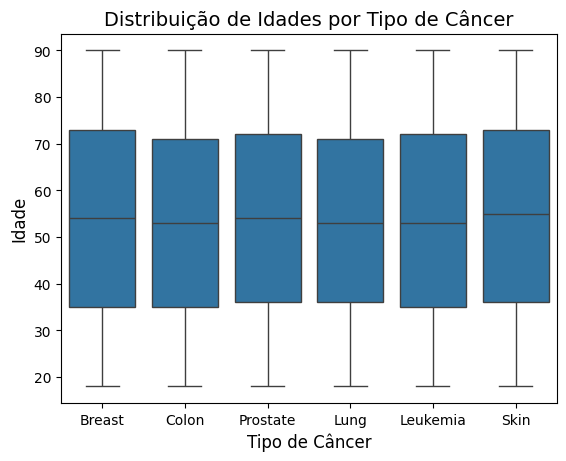

In [ ]:
sns.boxplot(x='CancerType', y='Age', data=cancer_df)
plt.title('Distribuição de Idades por Tipo de Câncer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Idade', fontsize=12)

Text(0, 0.5, 'Stage')

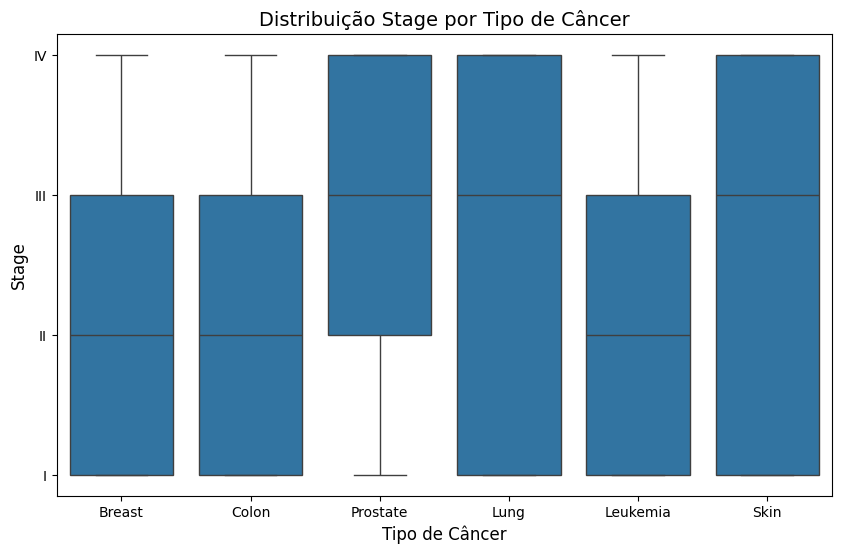

In [ ]:
stage_order = ["IV", "III", 'II', 'I']
cancer_df['Stage'] = pd.Categorical(cancer_df['Stage'], categories=stage_order, ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='CancerType', y='Stage', data=cancer_df)
plt.title('Distribuição Stage por Tipo de Câncer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Stage', fontsize=12)

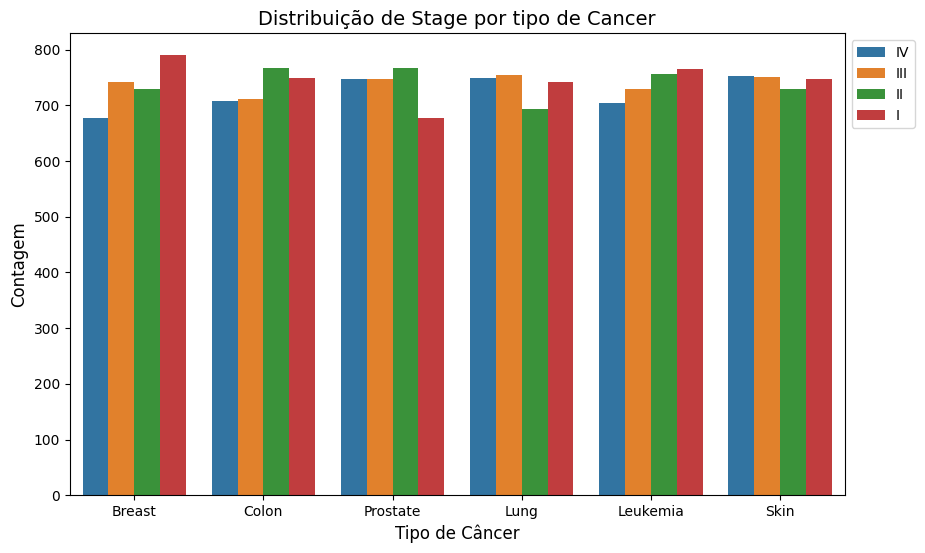

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CancerType', hue='Stage', data=cancer_df)
plt.title('Distribuição de Stage por tipo de Cancer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

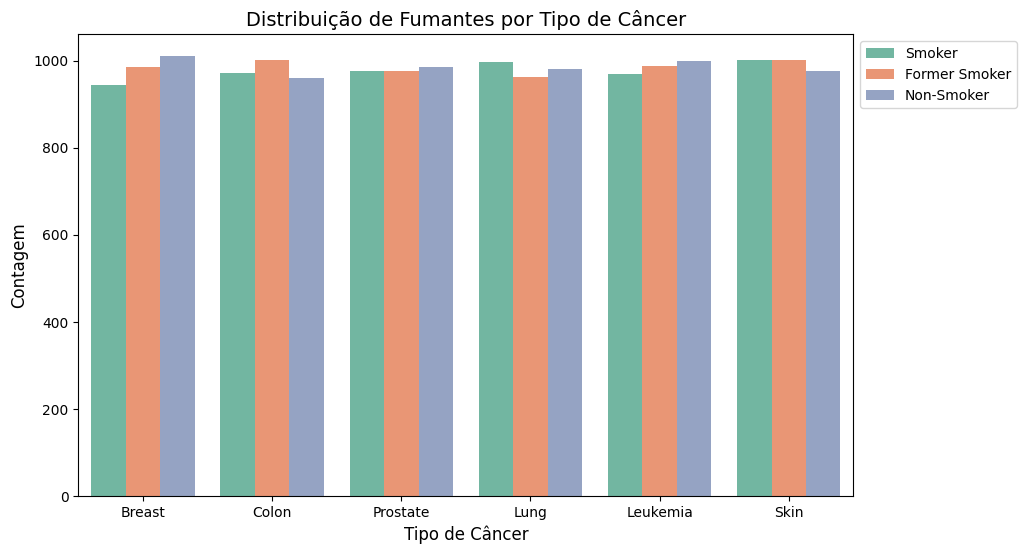

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CancerType', hue='SmokingStatus', data=cancer_df, palette='Set2')
plt.title('Distribuição de Fumantes por Tipo de Câncer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

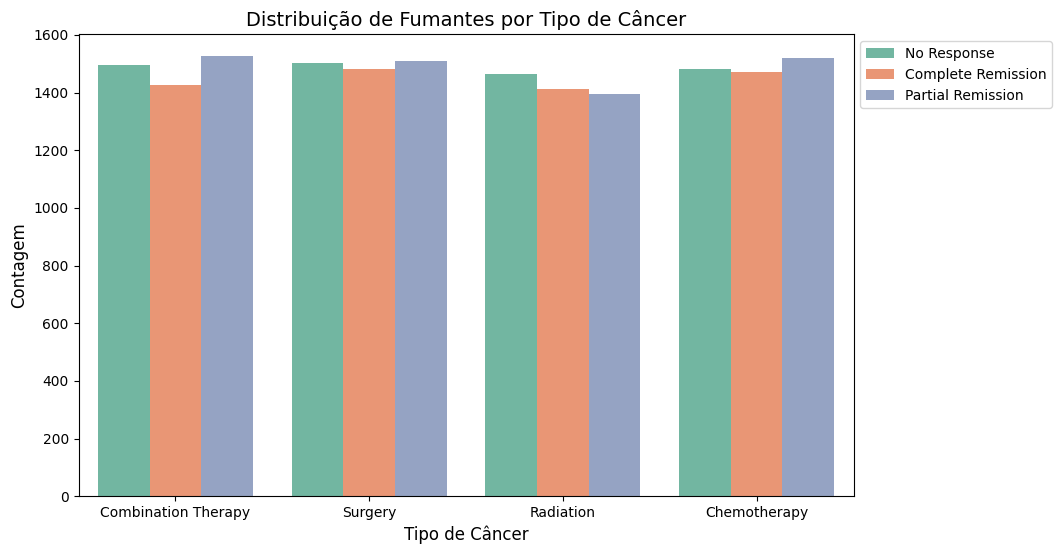

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TreatmentType', hue='TreatmentResponse', data=cancer_df, palette='Set2')
plt.title('Distribuição de Fumantes por Tipo de Câncer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Text(0, 0.5, 'Idade')

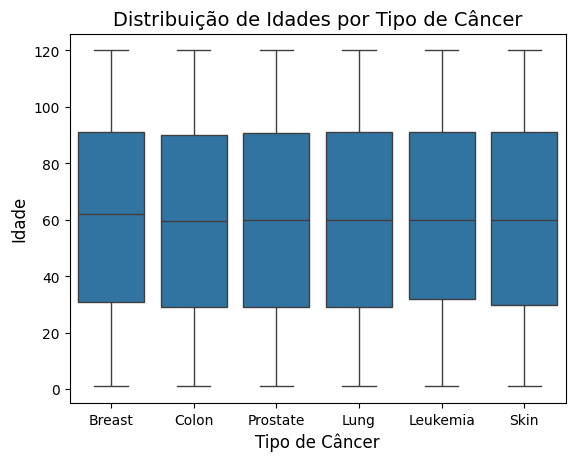

In [ ]:
sns.boxplot(x='CancerType', y='SurvivalMonths', data=cancer_df)
plt.title('Distribuição de Idades por Tipo de Câncer', fontsize=14)
plt.xlabel('Tipo de Câncer', fontsize=12)
plt.ylabel('Idade', fontsize=12)

# MACHINE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df_predict_genetic_marker = cancer_df[cancer_df['GeneticMarker'].isin(["NO DATA"])]

In [ ]:
df = cancer_df[cancer_df['GeneticMarker'] != "NO DATA"]
df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South
6,7,60,Female,Hispanic,26.3,Former Smoker,Yes,Breast,I,5.3,Surgery,Partial Remission,88,No,KRAS,West


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usar drop='first' para evitar multicolinearidade

# Aplicar OneHotEncoder nas colunas categóricas
encoded_columns = encoder.fit_transform(df[['Gender', 'SmokingStatus', 'FamilyHistory',
                                            'CancerType', 'TreatmentType', 'TreatmentResponse',
                                            'Recurrence', 'HospitalRegion', 'Race/Ethnicity']])

# Criar nomes para as colunas codificadas
encoded_column_names = encoder.get_feature_names_out(['Gender', 'SmokingStatus', 'FamilyHistory',
                                                      'CancerType', 'TreatmentType', 'TreatmentResponse',
                                                      'Recurrence', 'HospitalRegion', 'Race/Ethnicity'])

# Criar DataFrame com os dados codificados
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concatenar as colunas codificadas ao DataFrame original (opcional)
df_final = df.join(encoded_df)

encoder = LabelEncoder()
df_final['Stage_Enconded'] = encoder.fit_transform(df_final['Stage'])

df_final = df_final.drop(columns=['Stage', 'PatientID', 'Gender', 'Race/Ethnicity','SmokingStatus', 'FamilyHistory', 'CancerType', 'TreatmentType', 'TreatmentResponse', 'Recurrence', 'HospitalRegion'])

df_final.columns

Index(['Age', 'BMI', 'TumorSize', 'SurvivalMonths', 'GeneticMarker',
       'Gender_Male', 'SmokingStatus_Non-Smoker', 'SmokingStatus_Smoker',
       'FamilyHistory_Yes', 'CancerType_Colon', 'CancerType_Leukemia',
       'CancerType_Lung', 'CancerType_Prostate', 'CancerType_Skin',
       'TreatmentType_Combination Therapy', 'TreatmentType_Radiation',
       'TreatmentType_Surgery', 'TreatmentResponse_No Response',
       'TreatmentResponse_Partial Remission', 'Recurrence_Yes',
       'HospitalRegion_North', 'HospitalRegion_South', 'HospitalRegion_West',
       'Race/Ethnicity_Asian', 'Race/Ethnicity_Caucasian',
       'Race/Ethnicity_Hispanic', 'Race/Ethnicity_Other', 'Stage_Enconded'],
      dtype='object')

In [ ]:
df_final.columns

Index(['Age', 'BMI', 'TumorSize', 'SurvivalMonths', 'GeneticMarker',
       'Gender_Male', 'SmokingStatus_Non-Smoker', 'SmokingStatus_Smoker',
       'FamilyHistory_Yes', 'CancerType_Colon', 'CancerType_Leukemia',
       'CancerType_Lung', 'CancerType_Prostate', 'CancerType_Skin',
       'TreatmentType_Combination Therapy', 'TreatmentType_Radiation',
       'TreatmentType_Surgery', 'TreatmentResponse_No Response',
       'TreatmentResponse_Partial Remission', 'Recurrence_Yes',
       'HospitalRegion_North', 'HospitalRegion_South', 'HospitalRegion_West',
       'Race/Ethnicity_Asian', 'Race/Ethnicity_Caucasian',
       'Race/Ethnicity_Hispanic', 'Race/Ethnicity_Other', 'Stage_Enconded'],
      dtype='object')

In [ ]:
X = df_final[['Age', 'BMI', 'TumorSize',
       'SurvivalMonths', 'Gender_Male',
       'SmokingStatus_Non-Smoker', 'SmokingStatus_Smoker', 'FamilyHistory_Yes',
       'CancerType_Colon', 'CancerType_Leukemia', 'CancerType_Lung',
       'CancerType_Prostate', 'CancerType_Skin',
       'TreatmentType_Combination Therapy', 'TreatmentType_Radiation',
       'TreatmentType_Surgery', 'TreatmentResponse_No Response',
       'TreatmentResponse_Partial Remission', 'Recurrence_Yes',
       'HospitalRegion_North', 'HospitalRegion_South', 'HospitalRegion_West', 'Race/Ethnicity_Asian',
       'Race/Ethnicity_Caucasian', 'Race/Ethnicity_Hispanic',
       'Race/Ethnicity_Other', 'Stage_Enconded']]
y = df_final['GeneticMarker']

print(f"X = {X.shape}")
print(f"y = {y.shape}")
print(f"df_final = {df_final.shape}")

X = (13360, 27)
y = (13360,)
df_final = (13360, 28)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Exibir os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 9352 amostras
Tamanho do conjunto de teste: 4008 amostras


In [ ]:
# Criar o modelo de classificação (Random Forest)
model = RandomForestClassifier(random_state=17, n_estimators=500)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.33

Relatório de Classificação:
               precision    recall  f1-score   support

       BRCA1       0.33      0.37      0.35      1312
        EGFR       0.32      0.30      0.31      1360
        KRAS       0.34      0.31      0.32      1336

    accuracy                           0.33      4008
   macro avg       0.33      0.33      0.33      4008
weighted avg       0.33      0.33      0.33      4008

